<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/Best%26WorstDaysToInvest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 875 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [6]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
plt.style.use('fivethirtyeight')

In [3]:
#Determine the best and worst days for returns from the S&P500

In [11]:
#Get the stock symbols for the portfolio 
#FAANG

#Load the data 
tick = 'SPY'

#Show the data
df = yf.download(tick, start = '1993-01-01', end = '2022-7-3')
#df = df[['Adj Close']]

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.438084,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.619020,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.673290,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.944683,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.053247,531500
...,...,...,...,...,...,...
2022-06-27,391.049988,391.359985,387.440002,388.589996,388.589996,66009600
2022-06-28,390.230011,393.160004,380.529999,380.649994,380.649994,86548900
2022-06-29,381.230011,382.269989,378.420013,380.339996,380.339996,65676000


In [12]:

Mon = []
Tues = []
Wed = []
Thurs = []
Fri = []
Sat = []
Sun = []

#Create a function to get the daily simple return for each day and apend it to the corresponding day 

def get_dsr(day, dsr):
  
  if day == 'Monday':
    Mon.append(float(dsr))
  elif day == 'Tuesday':
    Tues.append(float(dsr))
  elif day == 'Wednesday':
    Wed.append(float(dsr))
  elif day == 'Thursday':
    Thurs.append(float(dsr))
  elif day == 'Friday':
    Fri.append(float(dsr))
  elif day == 'Saturday':
    Sat.append(float(dsr))
  elif day == 'Sunday':
    Sun.append(float(dsr))
  else: 
    print('Something is wrong with the input for the day')

In [14]:
DSR = df['Close'].pct_change(1)
df['DSR'] = DSR

#Remove the first row of data from the dataset 
df = df[1:]

#Show the current dataset
df

,Open,High,Low,Close,Adj Close,Volume,DSR
Date,,,,,,,
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.619020,480500,0.007112
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.673290,201300,0.002119
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.944683,529400,0.010571
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.053247,531500,0.004184
1993-02-05,44.968750,45.062500,44.718750,44.968750,26.035154,492100,-0.000694
...,...,...,...,...,...,...,...
2022-06-27,391.049988,391.359985,387.440002,388.589996,388.589996,66009600,-0.003820
2022-06-28,390.230011,393.160004,380.529999,380.649994,380.649994,86548900,-0.020433
2022-06-29,381.230011,382.269989,378.420013,380.339996,380.339996,65676000,-0.000814


In [17]:
#Create a loop to gather the DSR of each day from the dataset
for i in range(0, len(df)):
  df_date = str(df.index[i]) #Get the current date and cast it as a string 
  df_dsr = df['DSR'][i] #Get the current DSR
  df_month = df_date.split('-')[1] #Get the current month
  curr_date = df.index[i] #Get the current date
  df_weekday = calendar.day_name[curr_date.weekday()] #get the weekday

  #Add the DSR to the corresponding list for the day 
  get_dsr(df_weekday, df_dsr)

In [18]:
#Create a function to average the returns of each weekday
def AVG(day):
  if not day: #if this is true then the list is empty so return a list containing 0 
    return[0]
  else: 
    return [sum(day)/len(day)]


In [19]:
#Create a new df to set the index to be the days of the week

df_returns = pd.DataFrame(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#Get the average for each weekday and add the values under the column called AVG 

df_returns['AVG'] = AVG(Mon) + AVG(Tues) + AVG(Wed) + AVG(Thurs) + AVG(Fri) + AVG(Sat) + AVG(Sun)

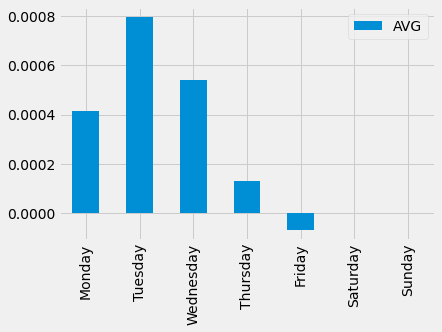

In [20]:
#Plot the AVG DSR

df_returns.plot.bar()

In [21]:
#Show the returns 
df_returns

,AVG
Monday,0.000415
Tuesday,0.000795
Wednesday,0.000540
Thursday,0.000132
Friday,-0.000068
Saturday,0.000000
Sunday,0.000000
